# [과제 2] 회귀분석
### - Ch 1, Ch 2를 토대로 자유롭게 회귀분석과 회귀진단을 진행해주세요.
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

# Data

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction

< y >
* **Price** : The price of the used car in INR Lakhs.



< X >
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [2]:
# Load Data
data = pd.read_csv("assignment2_data.csv").iloc[:,1:]
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


# 결측치 이상치 처리

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [4]:
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [5]:
data['Power']  = data.Power.map(lambda x : str(x).split()[0])

In [6]:
np.mean(data['Kilometers_Driven'])

58738.38029573019

In [7]:
#띄어쓰기 기준으로 구분
data['Mileage'] = data.Mileage.map(lambda x : float(str(x).split()[0]))
data['Engine'] = data.Engine.map(lambda x : float(str(x).split()[0]))
data['Power'] = data.Power.map(lambda x : str(x).split()[0]).map(lambda x : float(x) if x != "null" else np.nan)

# New_Price의 경우, 단위에 따라 Lakh , Cr이 나뉘어 지기 때문에 단위가 Cr이라면 100을 곱해줌으로써 Lakh과 동일하게 변경
def get_New_Price(x):
    x = str(x)
    if x == 'nan' : return np.nan
    x_list = x.split()
    if x_list[1] == "Lakh": return float(x_list[0])
    return float(x_list[0]) * 100

data['New_Price'] = data['New_Price'].map(lambda x : get_New_Price(x))

In [8]:
(data.isnull().sum() / len(data))*100

Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.033228
Engine                0.598106
Power                 2.375810
Seats                 0.697790
New_Price            86.310018
Price                 0.000000
dtype: float64

In [9]:
#New_Price를 제외한 나머지 데이터의 경우, 결측치 비율이 매우 낮으므로 평균값 대체
#New_Price의 경우, 결측치 비율이 80%가 넘으므로 다른 값으로 대체하기 어렵다고 판단 -> 삭제

In [10]:
data['Mileage'].fillna(np.mean(data['Mileage']),inplace=True)
data['Engine'].fillna(np.mean(data['Engine']),inplace=True)
data['Power'].fillna(np.mean(data['Power']),inplace=True)
data['Seats'].fillna(np.mean(data['Seats']),inplace=True)
data.drop(columns=['New_Price'],axis=1,inplace=True)

In [11]:
(data.isnull().sum() / len(data))*100

Name                 0.0
Location             0.0
Year                 0.0
Kilometers_Driven    0.0
Fuel_Type            0.0
Transmission         0.0
Owner_Type           0.0
Mileage              0.0
Engine               0.0
Power                0.0
Seats                0.0
Price                0.0
dtype: float64

# EDA & Feature Engineering

In [12]:
#Name 칼럼을 분리하여 새로운 Brand column과 Model column 생성
data['Brand'] = data.Name.map(lambda x : x.split()[0])
data['Model'] = data.Name.map(lambda x :" ".join(x.split()[1:]))

<Axes: xlabel='Brand', ylabel='Price'>

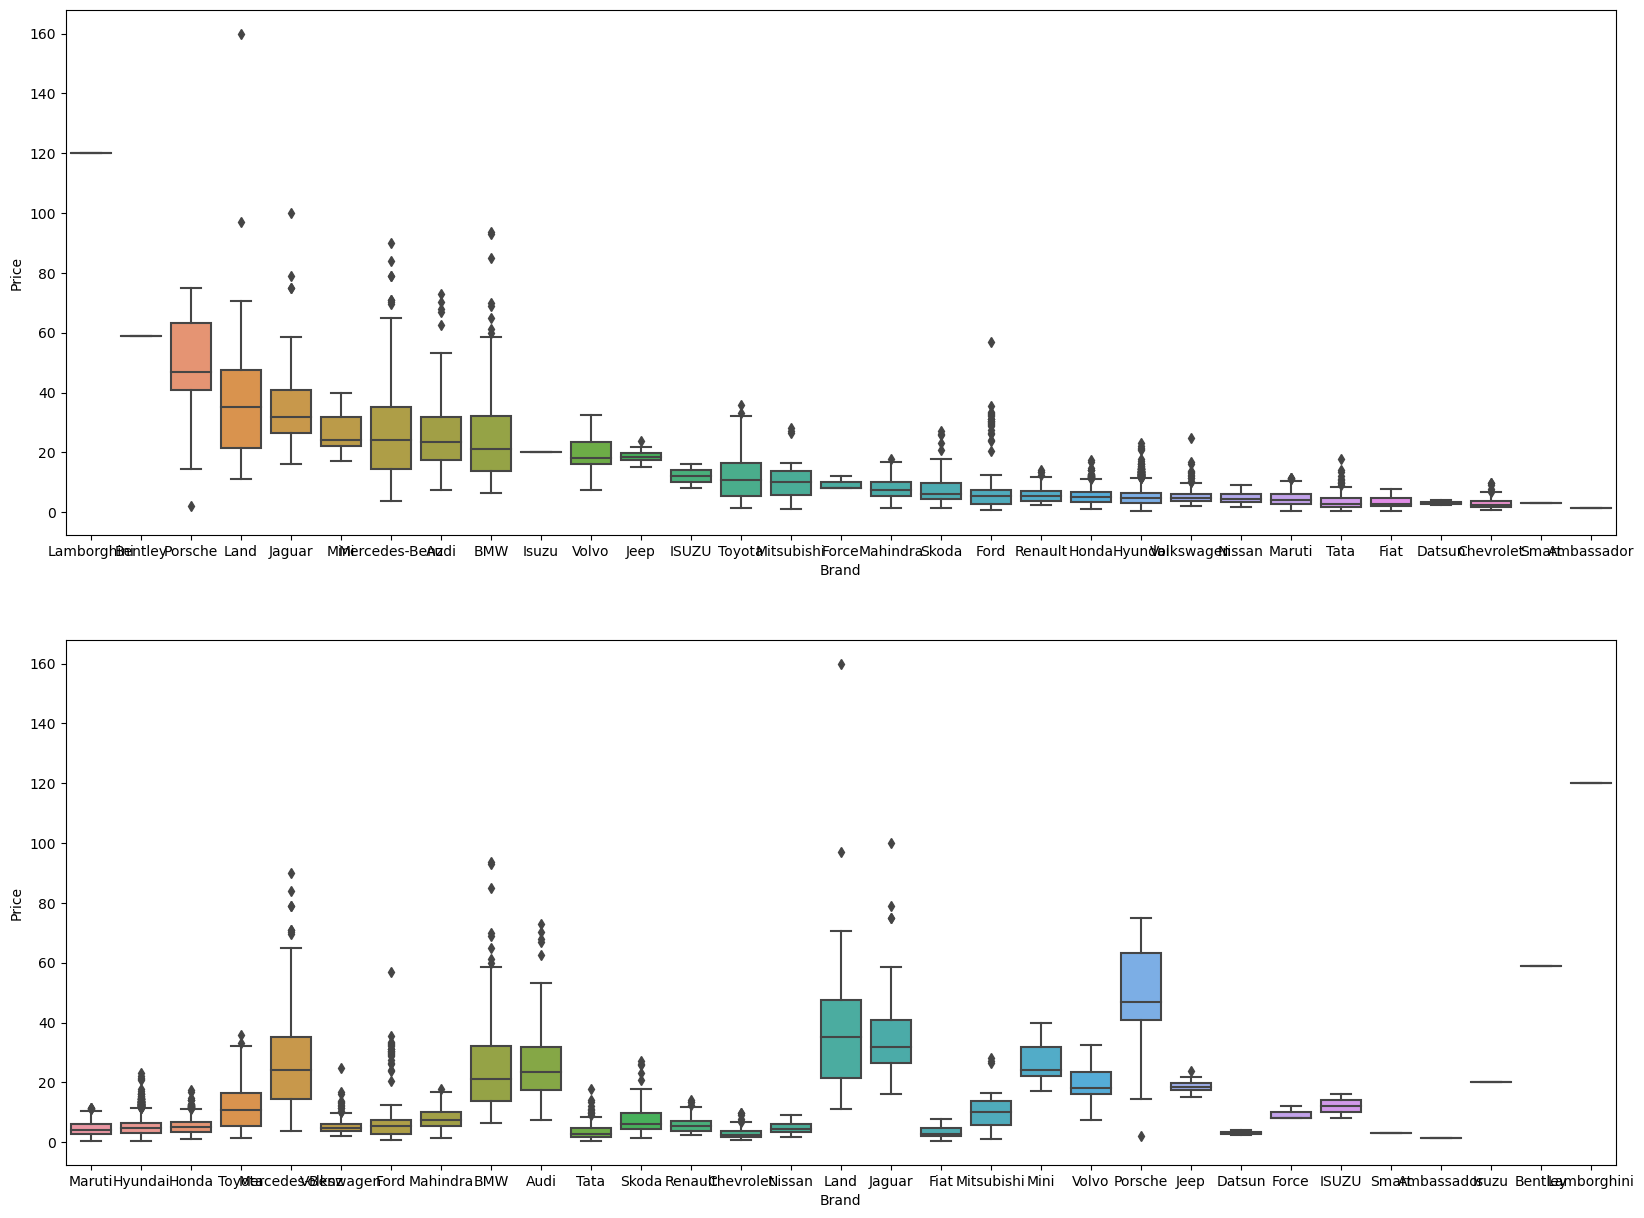

In [13]:
#브랜드별로 가격차가 존재, 모델의 수가 많이 존재할수록 가격은 낮아진다는 결과를 볼 수 있음
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20,15))

orders = data.groupby('Brand').mean().sort_values('Price', ascending=False).index
sns.boxplot(data=data, y='Price', x='Brand', order = orders, ax = ax[0])

orders = data['Brand'].value_counts().index
sns.boxplot(data=data, y='Price', x='Brand', order = orders, ax = ax[1])


In [14]:
#원본 컬럼 삭제
data.drop(columns=['Name'],axis=1,inplace=True)

Text(0.5, 1.0, 'Mileage Log Transformation After')

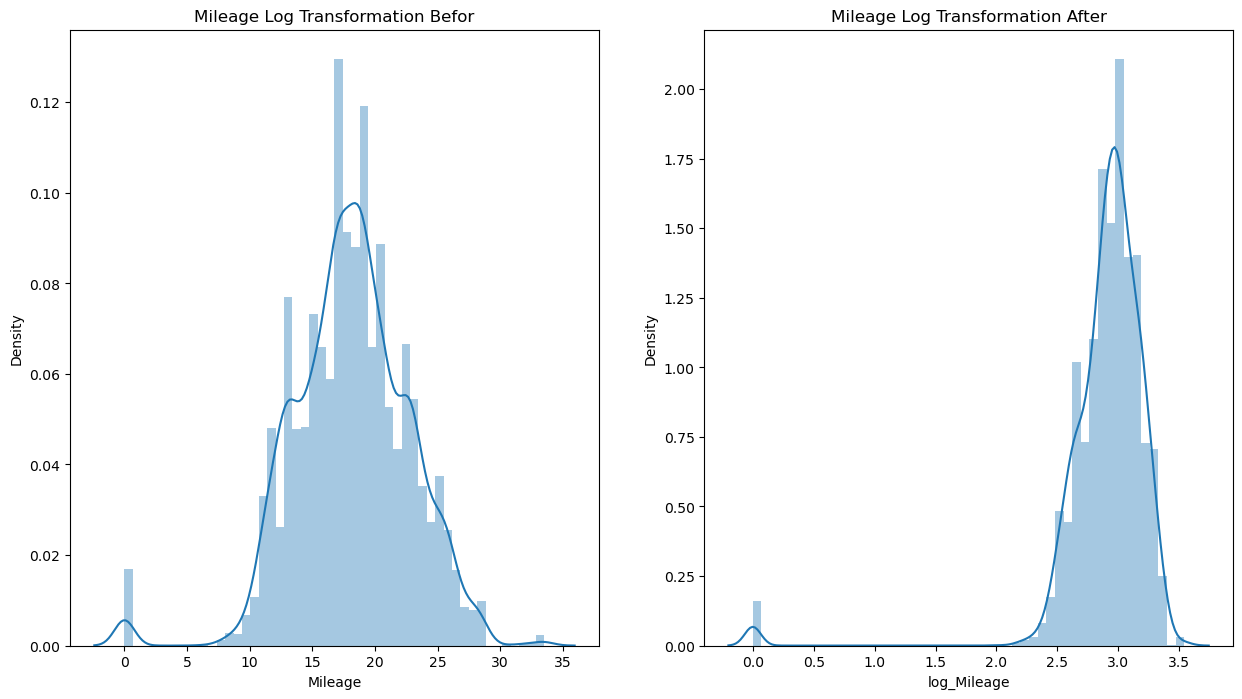

In [15]:
# 로그 변환
data['log_Mileage']= data['Mileage'].map(lambda x : np.log1p(x))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
sns.distplot(data['Mileage'], ax = ax[0])
sns.distplot(data['log_Mileage'], ax = ax[1])
ax[0].set_title('Mileage Log Transformation Befor')
ax[1].set_title('Mileage Log Transformation After')

Text(0.5, 1.0, 'Engine Log Transformation After')

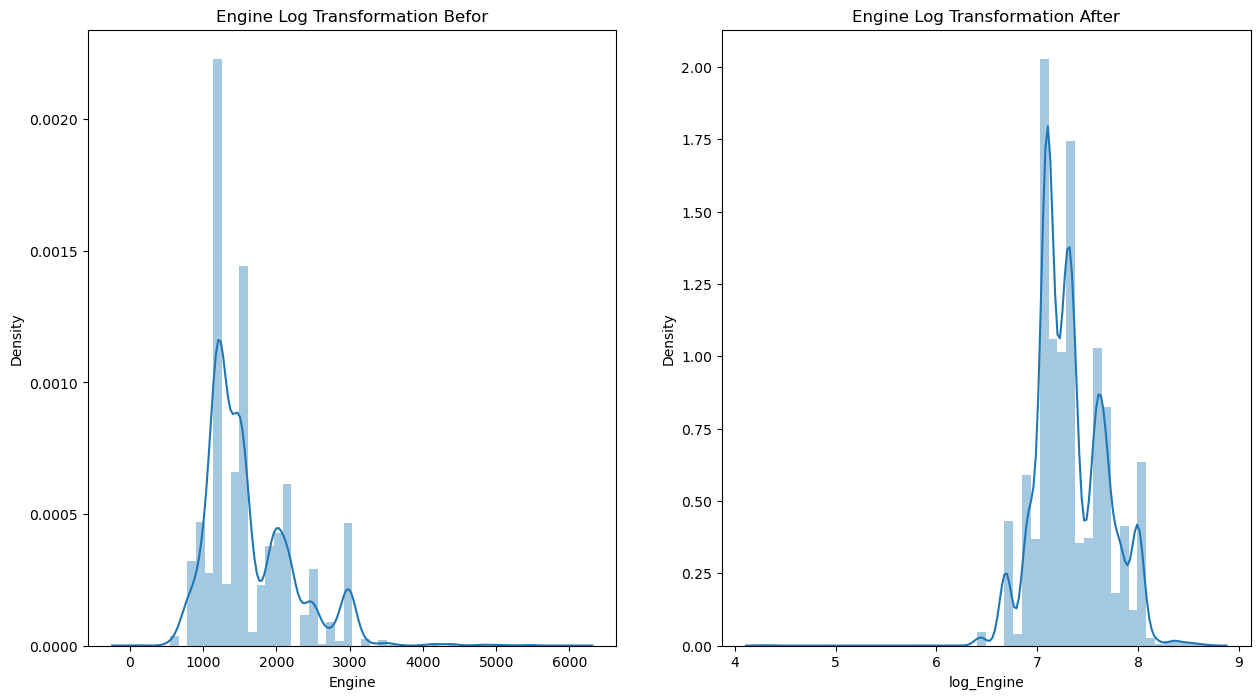

In [16]:
# 로그 변환
data['log_Engine']= data['Engine'].map(lambda x : np.log1p(x))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
sns.distplot(data['Engine'], ax = ax[0])
sns.distplot(data['log_Engine'], ax = ax[1])
ax[0].set_title('Engine Log Transformation Befor')
ax[1].set_title('Engine Log Transformation After')

Text(0.5, 1.0, 'Power Log Transformation After')

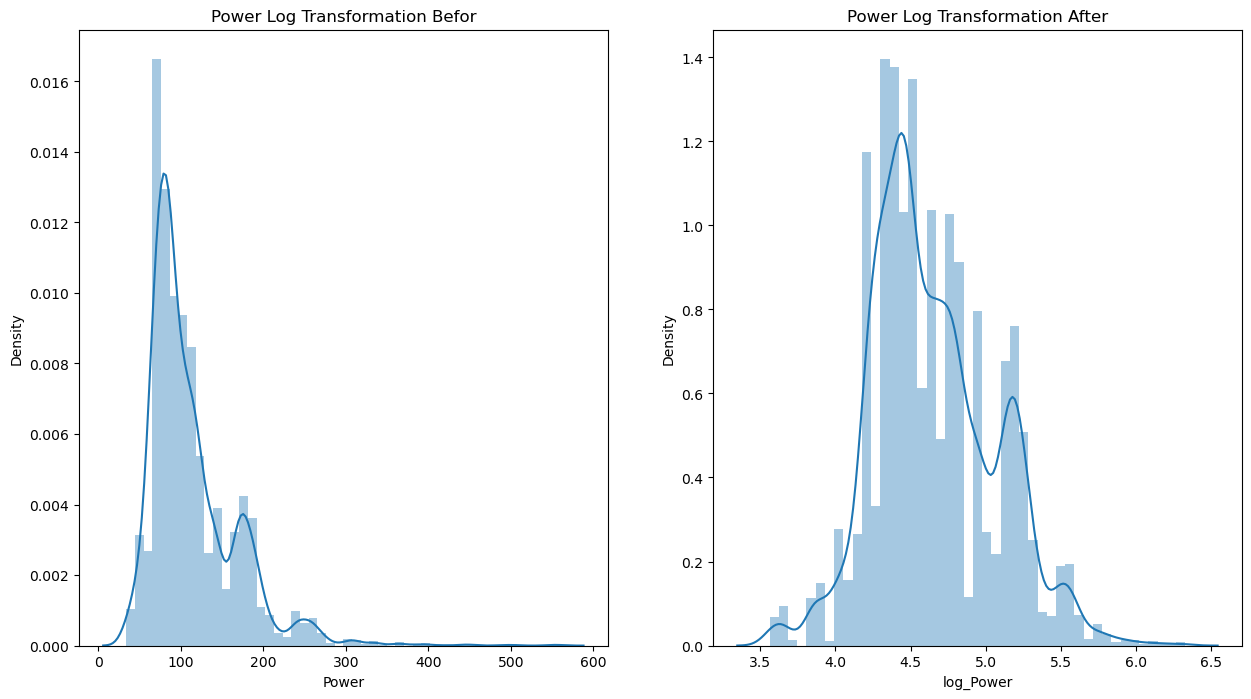

In [17]:
# 로그 변환
data['log_Power']= data['Power'].map(lambda x : np.log1p(x))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
sns.distplot(data['Power'], ax = ax[0])
sns.distplot(data['log_Power'], ax = ax[1])
ax[0].set_title('Power Log Transformation Befor')
ax[1].set_title('Power Log Transformation After')

Text(0.5, 1.0, 'Price Log Transformation After')

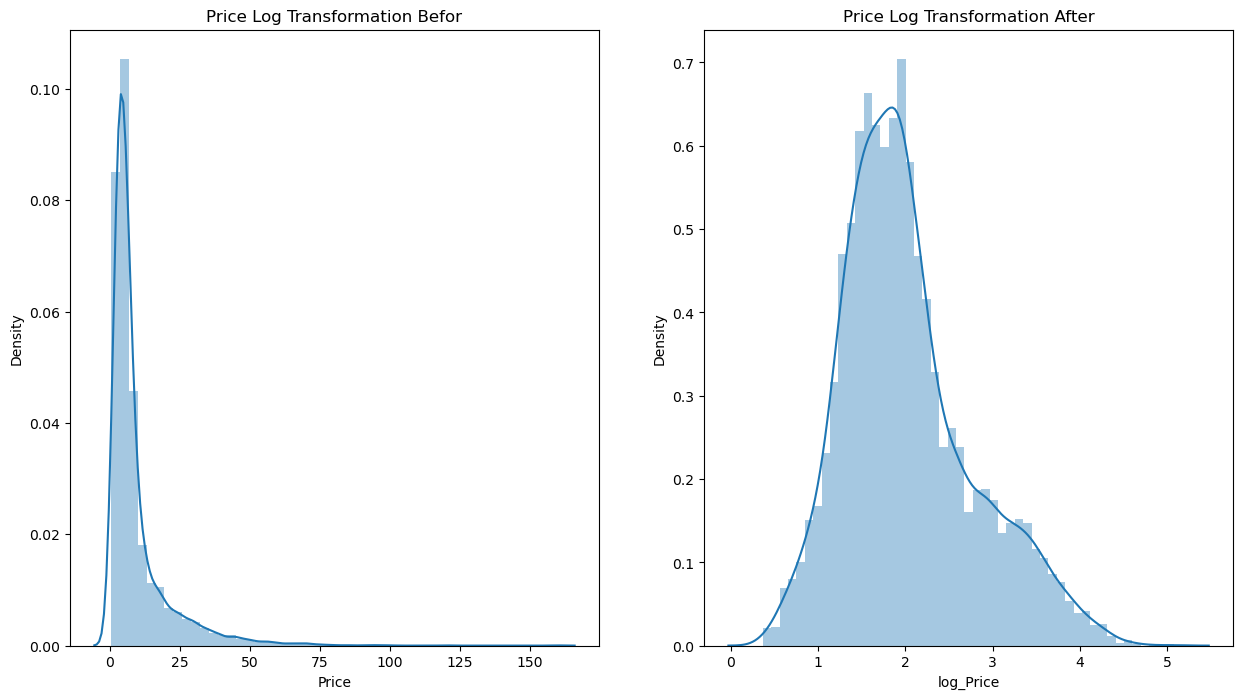

In [18]:
# 로그 변환
data['log_Price']= data['Price'].map(lambda x : np.log1p(x))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
sns.distplot(data['Price'], ax = ax[0])
sns.distplot(data['log_Price'], ax = ax[1])
ax[0].set_title('Price Log Transformation Befor')
ax[1].set_title('Price Log Transformation After')

In [19]:
data.drop(columns=['Mileage','Engine','Power','Price'],axis=1, inplace=True)

In [20]:
#로그 변환을 통해서 정규 분포와 유사해지도록 설정

# Encoding

In [21]:
data['Year'] = data.Year.astype('str')
data['Seats'] = data.Seats.astype('int').astype('str')
# 원핫인코딩을 시행
cat_data=pd.get_dummies(data)

num_cols = ['log_Mileage', 'log_Engine', 'log_Power', 'log_Price']
num_data = data[num_cols]

# 범주형 데이터와 수치형 데이터를 합침
train = pd.concat([cat_data, num_data], axis=1)

In [22]:
feature = data.iloc[:,:-1]
target = data['log_Price']

In [23]:
feature

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Brand,Model,log_Mileage,log_Engine,log_Power
0,Mumbai,2010,72000,CNG,Manual,First,5,Maruti,Wagon R LXI CNG,3.317816,6.906755,4.080246
1,Pune,2015,41000,Diesel,Manual,First,5,Hyundai,Creta 1.6 CRDi SX Option,3.028683,7.367077,4.845761
2,Chennai,2011,46000,Petrol,Manual,First,5,Honda,Jazz V,2.954910,7.090077,4.496471
3,Chennai,2012,87000,Diesel,Manual,First,7,Maruti,Ertiga VDI,3.080533,7.130099,4.497139
4,Coimbatore,2013,40670,Diesel,Automatic,Second,5,Audi,A4 New 2.0 TDI Multitronic,2.785011,7.585281,4.954418
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,5,Maruti,Swift VDI,3.380995,7.130099,4.317488
6015,Jaipur,2015,100000,Diesel,Manual,First,5,Hyundai,Xcent 1.1 CRDi S,3.234749,7.021976,4.276666
6016,Jaipur,2012,55000,Diesel,Manual,Second,8,Mahindra,Xylo D4 BSIV,2.708050,7.823646,4.727388
6017,Kolkata,2013,46000,Petrol,Manual,First,5,Maruti,Wagon R VXI,2.990720,6.906755,4.220977


# Modeling

In [26]:
from sklearn.model_selection import train_test_split
# 데이터를 train과 test로 분리
X_train, X_test, y_train, y_test = train_test_split(train.iloc[:,:-1], train['log_Price'], test_size=0.3)

In [28]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred_train = lr.predict(X_train)
lr_pred_test = lr.predict(X_test)

In [29]:
from sklearn.metrics import mean_squared_error # MSE
# R-squared
print('Linear Regression train R-squared: ',lr.score(X_train, y_train))
print('Linear Regression test R-squared : ',lr.score(X_test, y_test))
# MSE
print('Linear Regression train MSE      : ',mean_squared_error(y_train, lr_pred_train))
print('Linear Regression test MSE       : ',mean_squared_error(y_test, lr_pred_test))

Linear Regression train R-squared:  1.0
Linear Regression test R-squared :  0.9999999999876032
Linear Regression train MSE      :  5.621902179736737e-21
Linear Regression test MSE       :  7.021676248085374e-12


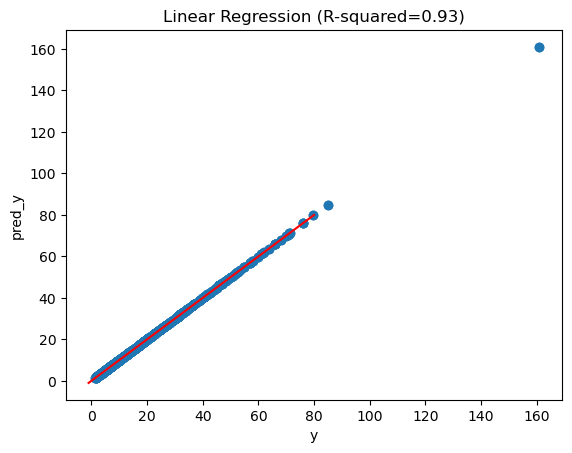

In [30]:
plt.scatter(np.exp(y_test), np.exp(lr_pred_test))
plt.plot([-1, 80], [-1, 80], 'r')
plt.xlabel('y')
plt.ylabel('pred_y')
plt.title('Linear Regression (R-squared=0.93)')
plt.show()